In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from datetime import date, time, datetime, timedelta
from IPython.display import clear_output
import scipy.stats
from statistics import mode

In [2]:
laptop = 'work'

if laptop == 'home':
    growth_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/growth_db.csv"
    weather_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/weather_db.csv"
    zone_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/zone_db.csv"
    
if laptop == 'work':
    growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
    weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
    zone_data_path = "F:\\Farm Data\Growth Model\\zone_db.csv"
    
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
zone_data = pd.read_csv(zone_data_path)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62978 entries, 0 to 62977
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             62967 non-null  datetime64[ns]
 1   time             62967 non-null  datetime64[ns]
 2   avg_temp         62967 non-null  float64       
 3   rh               62967 non-null  float64       
 4   rain             62967 non-null  float64       
 5   solar_radiation  62967 non-null  float64       
 6   wind_speed_avg   62967 non-null  float64       
 7   wind_speed_gust  6735 non-null   float64       
 8   soil_temp        6735 non-null   float64       
 9   bat_volt         62967 non-null  float64       
 10  leaf_wet         60962 non-null  float64       
 11  dew_point        60962 non-null  float64       
 12  day              62967 non-null  float64       
 13  month            62967 non-null  float64       
 14  day_month        62978 non-null  objec

In [6]:
weather_data.head()

date                time  avg_temp    rh  rain  solar_radiation  \
0 2014-05-14 1900-01-01 14:00:00      16.2  55.9   0.0            457.0   
1 2014-05-14 1900-01-01 15:00:00      17.4  51.2   0.0           1212.0   
2 2014-05-14 1900-01-01 16:00:00      17.7  48.9   0.0            862.0   
3 2014-05-14 1900-01-01 17:00:00      17.9  48.9   0.0            611.0   
4 2014-05-14 1900-01-01 18:00:00      17.2  51.0   0.0            232.0   

   wind_speed_avg  wind_speed_gust  soil_temp  bat_volt  leaf_wet  dew_point  \
0             2.7              NaN        NaN    6904.0       0.0        7.2   
1             2.2              NaN        NaN    6952.0       0.0        7.0   
2             2.1              NaN        NaN    6922.0       0.0        6.6   
3             2.0              NaN        NaN    6904.0       0.0        6.7   
4             1.7              NaN        NaN    6894.0       0.0        6.7   

    day  month   day_month  heat_units  
0  14.0    5.0  14.0 - 5.0    0.466667  
1  14.0    5.0  14.0 - 5.0    0.516667  
2  14.0    5.0  14.0 - 5.0    0.529167  
3  14.0    5.0  14.0 - 5.0    0.537500  
4  14.0    5.0  14.0 - 5.0    0.508333

In [7]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')
growth_data['fieldzone'] = growth_data["field"] + growth_data["zone"].astype(str)

stripping_coef = 0.92

growth_data['stripped_diameter'] = growth_data['diameter'] * stripping_coef

summary_data = growth_data

In [8]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91053 entries, 0 to 91052
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sample_date        91053 non-null  datetime64[ns]
 1   field              91053 non-null  object        
 2   zone               91053 non-null  int64         
 3   diameter           91053 non-null  float64       
 4   fieldzone          91053 non-null  object        
 5   stripped_diameter  91053 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
growth_data.head()

sample_date      field  zone  diameter   fieldzone  stripped_diameter
0  2019-07-17  Allans 18     1       4.0  Allans 181               3.68
1  2019-07-17  Allans 18     1       3.0  Allans 181               2.76
2  2019-07-17  Allans 18     1       5.0  Allans 181               4.60
3  2019-07-17  Allans 18     1       5.0  Allans 181               4.60
4  2019-07-17  Allans 18     1       3.0  Allans 181               2.76

In [10]:
zone_data['planting_date'] = pd.to_datetime(zone_data['planting_date'], format='%d/%m/%Y')
zone_data['est_harvest_date'] = pd.to_datetime(zone_data['est_harvest_date'], format='%d/%m/%Y')
zone_data["zone"] = zone_data["zone"].astype(str)
zone_data["fieldzone"] = zone_data["field"] + zone_data["zone"]

In [11]:
zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   field             649 non-null    object        
 1   zone              649 non-null    object        
 2   planting_date     649 non-null    datetime64[ns]
 3   variety           649 non-null    object        
 4   method            649 non-null    object        
 5   inputs            649 non-null    object        
 6   protection        649 non-null    object        
 7   planting_rate     649 non-null    int64         
 8   sand              649 non-null    int64         
 9   silt              649 non-null    int64         
 10  clay              649 non-null    int64         
 11  organic_matter    649 non-null    float64       
 12  est_harvest_date  649 non-null    datetime64[ns]
 13  fieldzone         649 non-null    object        
dtypes: datetime64[ns](2), floa

In [12]:
zone_data.head()

field zone planting_date  variety   method        inputs protection  \
0  Allans 07    1    2019-04-01  Krypton  Drilled  Conventional     Barley   
1  Allans 07    2    2019-04-01  Krypton  Drilled  Conventional     Barley   
2  Allans 07    3    2019-04-01  Longton  Drilled  Conventional     Barley   
3  Allans 07    4    2019-04-01  Longton  Drilled  Conventional     Barley   
4  Allans 07    5    2019-04-01   Batter  Drilled  Conventional     Barley   

   planting_rate  sand  silt  clay  organic_matter est_harvest_date  \
0         249820    39    37    24            29.6       2019-12-15   
1         249820    39    37    24            29.6       2019-12-15   
2         256524    39    37    24            29.6       2019-12-15   
3         256524    39    37    24            29.6       2019-12-15   
4         247048    39    37    24            29.6       2019-12-15   

    fieldzone  
0  Allans 071  
1  Allans 072  
2  Allans 073  
3  Allans 074  
4  Allans 075

In [13]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(zone_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [14]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [15]:
def cum_heat_units(start, finish, weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [16]:
summary_data.head()

fieldzone sample_date      field zone  diameter  stripped_diameter  \
0  Allans 071  2019-07-18  Allans 07    1       3.0               2.76   
1  Allans 071  2019-07-18  Allans 07    1       9.0               8.28   
2  Allans 071  2019-07-18  Allans 07    1       9.0               8.28   
3  Allans 071  2019-07-18  Allans 07    1       8.0               7.36   
4  Allans 071  2019-07-18  Allans 07    1      12.0              11.04   

          fieldzonedate planting_date  variety   method        inputs  \
0  Allans 0712019-07-18    2019-04-01  Krypton  Drilled  Conventional   
1  Allans 0712019-07-18    2019-04-01  Krypton  Drilled  Conventional   
2  Allans 0712019-07-18    2019-04-01  Krypton  Drilled  Conventional   
3  Allans 0712019-07-18    2019-04-01  Krypton  Drilled  Conventional   
4  Allans 0712019-07-18    2019-04-01  Krypton  Drilled  Conventional   

  protection  planting_rate  sand  silt  clay  organic_matter  \
0     Barley       249820.0  39.0  37.0  24.0            29.6   
1     Barley       249820.0  39.0  37.0  24.0            29.6   
2     Barley       249820.0  39.0  37.0  24.0            29.6   
3     Barley       249820.0  39.0  37.0  24.0            29.6   
4     Barley       249820.0  39.0  37.0  24.0            29.6   

  est_harvest_date  heat_units  solar_radiation  
0       2019-12-15           0                0  
1       2019-12-15           0                0  
2       2019-12-15           0                0  
3       2019-12-15           0                0  
4       2019-12-15           0                0

In [17]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'stripped_diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 
                            'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter'])**0.625
summary_data_avg['s_lin'] = (summary_data_avg['std_dev_diameter'])**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

fieldzonedate  mean_diameter  std_dev_diameter  pp2m2   method  \
0  Allans 0712019-07-18       6.685333          3.116170     45  Drilled   
1  Allans 0712019-08-29      19.020000          5.396129     46  Drilled   
2  Allans 0712019-10-29      35.047619          7.373478     42  Drilled   
3  Allans 0712020-01-13      35.220667         10.502927     42  Drilled   
4  Allans 0722019-07-18       6.537872          2.610864     47  Drilled   

         inputs  variety protection  sand  silt  clay  organic_matter  \
0  Conventional  Krypton     Barley  39.0  37.0  24.0            29.6   
1  Conventional  Krypton     Barley  39.0  37.0  24.0            29.6   
2  Conventional  Krypton     Barley  39.0  37.0  24.0            29.6   
3  Conventional  Krypton     Barley  39.0  37.0  24.0            29.6   
4  Conventional  Krypton     Barley  39.0  37.0  24.0            29.6   

  planting_date sample_date   fieldzone     d_lin     s_lin  heat_units  \
0    2019-04-01  2019-07-18  Allans 071  3.278702  2.034760           0   
1    2019-04-01  2019-08-29  Allans 071  6.302409  2.867817           0   
2    2019-04-01  2019-10-29  Allans 071  9.234461  3.485742           0   
3    2019-04-01  2020-01-13  Allans 071  9.262932  4.348295           0   
4    2019-04-01  2019-07-18  Allans 072  3.233313  1.821756           0   

   solar_radiation  
0                0  
1                0  
2                0  
3                0  
4                0

In [18]:
weather_data_avg = weather_data.groupby(['date']).agg({'rain' : ['sum'],
                                                       'heat_units' : ['sum'],
                                                       'solar_radiation' : ['sum'],
                                                       'wind_speed_avg' : ['mean'],
                                                       'rh' : ['mean'],
                                                       'avg_temp' : ['mean']}).reset_index()

weather_data_avg.columns = ['date',
                            'rain',
                            'heat_units',
                            'solar_radiation',
                            'wind_speed_avg',
                            'rh',
                            'avg_temp']

weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

weather_data_avg_group = weather_data_avg.groupby(['day_month']).agg({'rain' : ['mean'],
                                                                      'heat_units' : ['mean'],
                                                                      'solar_radiation' : ['mean'],
                                                                      'wind_speed_avg' : ['mean'],
                                                                      'rh' : ['mean'],
                                                                      'avg_temp' : ['mean']}).reset_index()
weather_data_avg_group.columns = ['day_month',
                                  'rain',
                                  'heat_units',
                                  'solar_radiation',
                                  'wind_speed_avg',
                                  'rh',
                                  'avg_temp']

max_date = max(weather_data_avg.date)

for i in range(1, 500):
    
    clear_output(wait=True)
    
    date = max_date + timedelta(days=i)
    weather_data_avg = weather_data_avg.append({'date': date,
                                                'rain': np.nan,
                                                'heat_units':np.nan,
                                                'solar_radiation':np.nan,
                                                'wind_speed_avg':np.nan,
                                                'rh':np.nan,
                                                'avg_temp':np.nan }, ignore_index=True)
    
    print("Current Progress:", np.round(i/500*100,0),"%")
    
weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

Current Progress: 100.0 %


In [19]:
def mean_weather(day_month, variable):
    
    df = weather_data_avg_group[weather_data_avg_group['day_month']==day_month]
    weather_value = df[variable].sum()
    return weather_value

for variable in ['rain', 'heat_units', 'solar_radiation', 'wind_speed_avg', 'rh', 'avg_temp']:
    for i in weather_data_avg.index:
        clear_output(wait=True)
        if weather_data_avg[variable][i] == np.nan:
            test = 'test'
        else:
            day_month = weather_data_avg['day_month'][i]
            weather_data_avg[variable][i] = mean_weather(day_month, variable)
        print(f"{variable} progress:", np.round(i/len(weather_data_avg)*100,0),"%")
    
weather_data_avg

avg_temp progress: 100.0 %


date       rain  heat_units  solar_radiation  wind_speed_avg  \
0    2014-05-14   0.825000    4.829687      9217.820000        4.122604   
1    2014-05-15   0.925000    6.291146     11512.520000        3.593802   
2    2014-05-16   0.425000    7.422917      9943.060000        4.079896   
3    2014-05-17   4.650000    7.288021      9964.665000        3.792969   
4    2014-05-18   5.850000    7.395313     10198.580000        3.074792   
5    2014-05-19   0.875000    7.941146     11232.215000        3.850104   
6    2014-05-20   0.825000    8.527604     10693.015000        5.160990   
7    2014-05-21   0.525000    9.027083     11017.475000        8.278646   
8    2014-05-22   1.675000    8.840625     11270.720000        4.674531   
9    2014-05-23   0.450000    8.075000     11287.270000        5.625417   
10   2014-05-24   2.275000    8.179688     10252.590000        4.455833   
11   2014-05-25   0.000000    8.406250      9961.955000        4.786094   
12   2014-05-26   0.050000    9.231250     10688.685000        4.330312   
13   2014-05-27   3.950000    9.403646     10705.695000        3.724479   
14   2014-05-28   1.350000    8.879167     10533.250000        2.861875   
15   2014-05-29   1.700000    8.322396      9161.865000        3.753854   
16   2014-05-30   0.050000    9.083854      9663.945000        4.837917   
17   2014-05-31   3.950000    9.355729      9459.030000        4.417917   
18   2014-06-01   0.400000   10.521354     11261.765000        4.044167   
19   2014-06-02   0.800000   10.986458      9338.925000        4.710729   
20   2014-06-03   0.300000    9.895312      9973.485000        3.026406   
21   2014-06-04   2.025000    8.048437      7797.465000        3.726823   
22   2014-06-05   1.100000    9.013542     10164.325000        2.964115   
23   2014-06-06   2.625000    8.528646     11540.495000        2.767031   
24   2014-06-07   2.075000    9.533333     10508.750000        3.380521   
25   2014-06-08   0.500000    9.499479     10507.620000        2.761823   
26   2014-06-09   0.125000    9.582812     11075.940000        2.899010   
27   2014-06-10   2.250000    9.892188      9391.565000        3.502760   
28   2014-06-11   1.250000   10.702604     10717.525000        4.509323   
29   2014-06-12   1.250000   10.613021      9477.655000        3.659792   
30   2014-06-13   1.750000   11.009896     10095.180000        2.397396   
31   2014-06-14   1.075000   11.347917      9506.890000        4.221562   
32   2014-06-15   0.225000   10.392188     12014.545000        2.865104   
33   2014-06-16   1.250000   10.777604     10205.630000        2.964062   
34   2014-06-17   2.050000   11.459375      9634.385000        3.728646   
35   2014-06-18   7.550000   10.885417      8641.240000        5.662812   
36   2014-06-19   0.800000   10.985937      8548.475000        3.539531   
37   2014-06-20   2.750000   11.304688      8851.315000        4.384219   
38   2014-06-21   0.200000   10.697396     11084.435000        5.183958   
39   2014-06-22   2.037500   10.257292     10174.560000        5.103385   
40   2014-06-23   2.462500   11.171354     10612.765000        2.514323   
41   2014-06-24   0.587500   12.552604     11151.445000        2.699219   
42   2014-06-25   1.462500   12.029167     10364.580000        3.911979   
43   2014-06-26   0.512500   11.611458     11428.085000        4.907812   
44   2014-06-27   5.825000   11.040625      9533.070000        5.702708   
45   2014-06-28   5.725000    9.947396      8344.095000        4.562812   
46   2014-06-29   1.450000   10.526042      9233.205000        4.496823   
47   2014-06-30   0.200000   11.420312     11026.275000        4.181927   
48   2014-07-01   0.550000   12.141667     11067.635000        3.625365   
49   2014-07-02   0.025000   11.679167     12443.735000        2.707135   
50   2014-07-03   0.300000   11.978125     12028.410000        2.762656   
51   2014-07-04   3.250000   13.053646     11558.690000        3.098229   
52   2014-07-05   0.950000   12.8125

In [20]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [21]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


<AxesSubplot:xlabel='s_lin', ylabel='solar_radiation'>

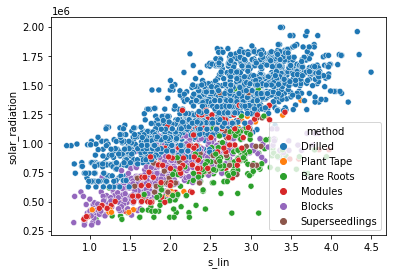

In [22]:
summary_data_avg = summary_data_avg.dropna()
sns.scatterplot(data = summary_data_avg, x = 's_lin', y = 'solar_radiation', hue = 'method')

In [23]:
summary_data_avg = pd.get_dummies(summary_data_avg, columns = ['protection'], drop_first = True)

In [24]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

In [25]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety'], drop_first = True)

In [26]:
summary_data_avg.loc[(summary_data_avg.solar_radiation == 0)]

Empty DataFrame
Columns: [fieldzonedate, mean_diameter, std_dev_diameter, pp2m2, method, inputs, variety, sand, silt, clay, organic_matter, planting_date, sample_date, fieldzone, d_lin, s_lin, heat_units, solar_radiation, protection_Fleece, protection_None, protection_Poly]
Index: []

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = X

#scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.9071072870214156

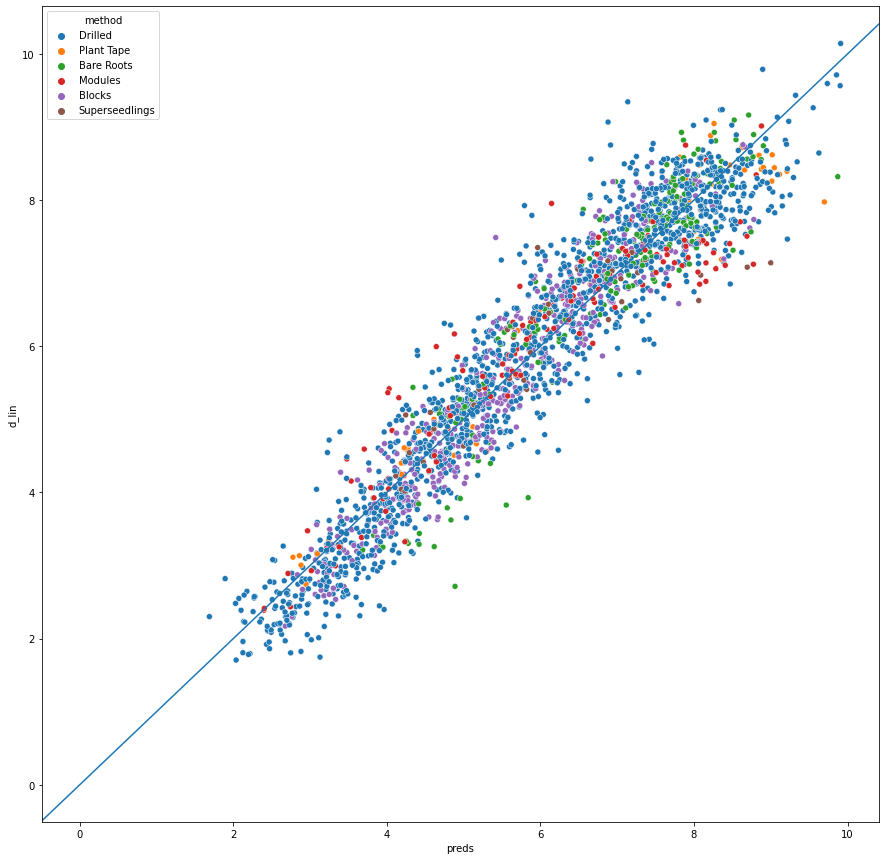

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()


In [29]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

variable      coef
0                   pp2m2  0.005355
1          organic_matter  0.016533
2                   s_lin  0.838337
3              heat_units  0.000794
4         solar_radiation  0.000004
5       protection_Fleece  0.583342
6         protection_None  0.217846
7         protection_Poly  0.980001
8           method_Blocks -1.365892
9          method_Drilled -3.432513
10         method_Modules -0.052942
11      method_Plant Tape -1.162645
12  method_Superseedlings -0.756058
13    inputs_Conventional  0.733584
14         inputs_Organic -0.112210
15         variety_Batter  0.098567
16         variety_Belton  0.204943
17       variety_Chiefton  0.027339
18       variety_Comanche  0.497518
19       variety_Defender  0.135167
20         variety_Fencer  0.472195
21        variety_Galvani -0.001103
22         variety_Gostar  0.315761
23        variety_Harston  0.095692
24        variety_Krypton  0.185642
25      variety_Lancaster  0.386536
26         variety_Lexton  0.016456
27       variety_Likestar -0.226006
28        variety_Linkton  0.686797
29        variety_Longton -0.129947
30      variety_Nun 70406  0.095668
31           variety_Oslo  0.495112
32        variety_Pluston  0.286950
33         variety_Runner  0.552281
34        variety_Shafton  0.484083
35        variety_Spheros  0.170847
36      variety_Stromboli -0.379771
37        variety_Sumstar  0.570821
38         variety_Triton -0.658097

In [30]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [31]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety'], drop_first = True)

In [32]:
X_1_scaled = X_1
#scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.8721270826336234

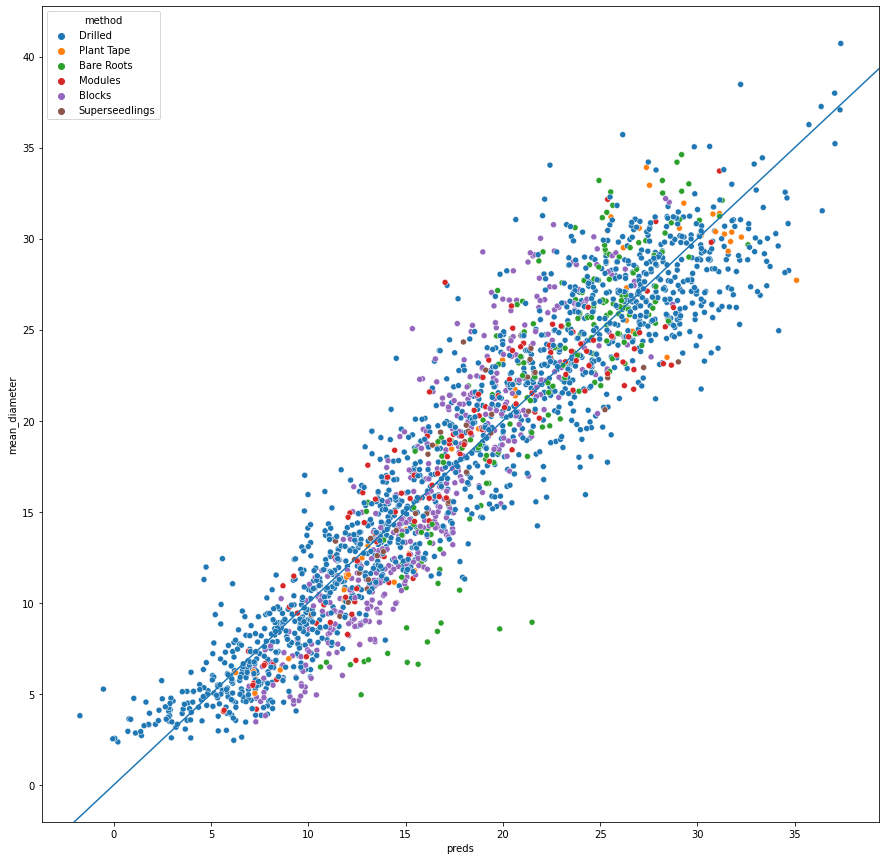

In [33]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [34]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list, 'coef': coef_list}, columns=['variable', 'coef'])

reg_coef_df

variable          coef
0                   pp2m2  3.262601e-02
1          organic_matter  7.020480e-02
2                   s_lin  4.880651e+00
3       protection_Fleece  2.849342e+00
4         protection_None  8.005776e-01
5         protection_Poly  4.725935e+00
6            growth_units  5.836269e-09
7           method_Blocks -5.562755e+00
8          method_Drilled -1.157293e+01
9          method_Modules -2.393501e-01
10      method_Plant Tape -4.345042e+00
11  method_Superseedlings -3.647051e+00
12    inputs_Conventional  4.577174e+00
13         inputs_Organic  2.033106e+00
14         variety_Batter -8.491017e-01
15         variety_Belton -2.414362e-01
16       variety_Chiefton -1.564034e+00
17       variety_Comanche  1.573714e+00
18       variety_Defender -6.747466e-02
19         variety_Fencer  1.500208e+00
20        variety_Galvani -2.112615e+00
21         variety_Gostar  1.427015e-01
22        variety_Harston -6.589928e-01
23        variety_Krypton -2.032241e-01
24      variety_Lancaster  2.590767e-01
25         variety_Lexton -1.857180e+00
26       variety_Likestar -2.840890e+00
27        variety_Linkton  2.596890e+00
28        variety_Longton -1.928868e+00
29      variety_Nun 70406 -1.114878e+00
30           variety_Oslo  8.479656e-01
31        variety_Pluston  1.099990e+00
32         variety_Runner  1.993604e+00
33        variety_Shafton  1.472958e+00
34        variety_Spheros  6.875560e-02
35      variety_Stromboli -4.181016e+00
36        variety_Sumstar  2.752860e+00
37         variety_Triton -4.661860e+00

In [35]:
def average_count(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    average_count = df['pp2m2'].mean()
    
    return average_count

average_count('Allans 071')

43.75

In [36]:
def max_sample_date(fieldzone):
    
    df = summary_data[summary_data['fieldzone']==fieldzone]
    max_sample_date = df['sample_date'].max()
    
    return max_sample_date

max_sample_date('Allans 071')

Timestamp('2020-01-13 00:00:00')

In [37]:
def max_mean_diameter_lin(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_mean_diameter = df['mean_diameter'].max()
    max_mean_diameter_lin = max_mean_diameter ** 0.625
    
    return max_mean_diameter_lin

max_mean_diameter_lin('Allans 071')

9.26293214352213

In [38]:
def max_std_dev_diameter_lin(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_std_dev_diameter = df['std_dev_diameter'].max()
    max_std_dev_diameter_lin = max_std_dev_diameter ** 0.625
    
    return max_std_dev_diameter_lin

max_std_dev_diameter_lin('Allans 071')

4.348294771174176

In [39]:
def max_solar(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_solar = df['solar_radiation'].max()
    
    return max_solar

max_solar('Allans 071')

1760685

In [40]:
def max_heat(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_heat = df['heat_units'].max()
    
    return max_heat

max_heat('Allans 071')

2092

In [41]:
zone_data['mean_pp2m2'] = 0.0
zone_data['max_sample_date'] = 0
zone_data['max_mean_diameter_lin'] = 0.0
zone_data['max_std_dev_diameter_lin'] = 0.0
zone_data['max_heat'] = 0.0
zone_data['max_solar'] = 0.0
zone_data['remaining_heat'] = 0.0
zone_data['remaining_solar'] = 0.0

for i in zone_data.index:
    
    clear_output(wait=True)
    
    fieldzone = zone_data.loc[i, 'fieldzone']
    zone_data.loc[i, 'mean_pp2m2'] = average_count(fieldzone)
    zone_data.loc[i, 'max_sample_date'] = max_sample_date(fieldzone)
    zone_data.loc[i, 'max_mean_diameter_lin'] = max_mean_diameter_lin(fieldzone)
    zone_data.loc[i, 'max_std_dev_diameter_lin'] = max_std_dev_diameter_lin(fieldzone)
    zone_data.loc[i, 'max_heat'] = max_heat(fieldzone)
    zone_data.loc[i, 'max_solar'] = max_solar(fieldzone)
    start = zone_data.loc[i, 'max_sample_date']
    finish = zone_data.loc[i, 'est_harvest_date']
    zone_data.loc[i, 'remaining_heat'] = cum_heat_units(start, finish, weather_data_avg)
    zone_data.loc[i, 'remaining_solar'] = cum_solar_radiation(start, finish, weather_data_avg)   
    
    print("Current Progress:", np.round(i/len(zone_data)*100,0),"%")

Current Progress: 100.0 %


In [42]:
zone_data = zone_data.dropna()
zone_data

field zone planting_date    variety          method  \
0                 Allans 07    1    2019-04-01    Krypton         Drilled   
1                 Allans 07    2    2019-04-01    Krypton         Drilled   
2                 Allans 07    3    2019-04-01    Longton         Drilled   
3                 Allans 07    4    2019-04-01    Longton         Drilled   
4                 Allans 07    5    2019-04-01     Batter         Drilled   
5                 Allans 07    6    2019-04-01     Batter         Drilled   
6                 Allans 12    1    2020-05-02    Longton         Drilled   
7                 Allans 12    2    2020-05-02    Longton         Drilled   
8                 Allans 12    3    2020-05-02    Longton         Drilled   
9                 Allans 12    4    2020-05-02    Longton         Drilled   
10             Allans 16/17    1    2020-05-03     Lexton         Drilled   
11             Allans 16/17    2    2020-05-03     Batter         Drilled   
12             Allans 16/17    3    2020-05-03     Batter         Drilled   
13             Allans 16/17    4    2020-05-03   Chiefton         Drilled   
14             Allans 16/17    5    2020-05-05   Chiefton         Drilled   
15             Allans 16/17    6    2020-05-05     Lexton         Drilled   
16                Allans 18    1    2019-04-23     Lexton         Drilled   
17                Allans 18    2    2019-04-23     Lexton         Drilled   
18                Allans 18    3    2019-04-23     Lexton         Drilled   
19                Allans 18    4    2019-04-23     Lexton         Drilled   
20                Allans 18    5    2019-04-23     Lexton         Drilled   
21                Allans 18    6    2019-04-23     Lexton         Drilled   
22                Allans 18    7    2019-04-23   Chiefton         Drilled   
23                Allans 18    8    2019-04-23   Chiefton         Drilled   
26                Allans 22    3    2019-04-03    Krypton         Drilled   
27                Allans 22    4    2019-04-03    Krypton         Drilled   
30                Angoods 1    1    2020-04-07    Krypton         Drilled   
31                Angoods 1    2    2020-04-07    Krypton         Drilled   
32                Angoods 1    3    2020-04-08    Krypton         Drilled   
33                Angoods 1    4    2020-04-08    Krypton         Drilled   
34                Angoods 1    5    2020-04-08    Krypton         Drilled   
35                Angoods 1    6    2020-04-08    Krypton         Drilled   
36                Angoods 1    7    2020-04-08    Krypton         Drilled   
37                Angoods 4    1    2019-03-30   Chiefton         Drilled   
38                Angoods 4    2    2019-03-30   Chiefton         Drilled   
39    Chatteris Farms 07/08    1    2020-05-27    Pluston      Plant Tape   
40    Chatteris Farms 07/08    2    2020-05-27    Pluston      Plant Tape   
41    Chatteris Farms 07/08    3    2020-05-28    Pluston      Plant Tape   
42    Chatteris Farms 07/08    4    2020-05-28    Pluston      Plant Tape   
43      Chatteris Farms 27A    1    2019-04-24     Triton         Drilled   
44      Chatteris Farms 27A    2    2019-04-24     Triton         Drilled   
45      Chatteris Farms 27A    3    2019-04-24     Triton         Drilled   
46      Chatteris Farms 27A    4    2019-04-24     Triton         Drilled   
47      Chatteris Farms 27B    1    2019-05-22    Pluston      Plant Tape   
48      Chatteris Farms 27B    2    2019-05-22    Pluston      Plant Tape   
49      Chatteris Farms 27B    3    2019-05-22    Pluston      Plant Tape   
50      Chatteris Farms 27B    4    2019-05-22    Pluston      Plant Tape   
51         Garretts Decoy 3    1    2019-03-25    Linkton         Drilled   
52         Garretts Decoy 3    2    2019-03-25    Linkton         Drilled   
53         Garretts Decoy 3    3    2019-03-25    Linkton         Drilled   
54         Garretts Decoy 3    4    2019-03-25    Linkton         Drilled   
55         Garrett

In [43]:
def filter_data(data, method, inputs, variety):
    
    filtered = data[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['method'].str.contains(method)]
    
    return filtered

In [44]:
def predict_weather(start, finish, variable):
    
    df = weather_data_avg.loc[(weather_data_avg['date'] > start) & (weather_data_avg['date'] < finish), [variable]]
    pred_hu = df[variable].sum()
    
    return pred_hu

start = datetime(year=2021, month=6, day=2, hour=13, minute=14, second=31)
finish = datetime(year=2022, month=6, day=2, hour=13, minute=14, second=31)

predict_weather(start, finish, 'rain')

572.9482142857144

In [45]:
zone_data['est_mean_diameter_gain'] = 0.0
zone_data['est_std_dev_diameter_gain'] = 0.0

for i in zone_data.index:
    method = zone_data.loc[i, 'method']
    inputs = zone_data.loc[i, 'inputs']
    variety = zone_data.loc[i, 'variety']
    protection = zone_data.loc[i, 'protection']

    df = filter_data(summary_data_avg, method, inputs, variety)
    X = df[['solar_radiation', 'heat_units', 'pp2m2', 'organic_matter', 'protection_Fleece', 'protection_None', 'protection_Poly']]
    y_dl = df['d_lin']
    y_sd = df['s_lin']

    reg_dl = LinearRegression().fit(X, y_dl)
    solar_radiation_dl_coef = reg_dl.coef_[0]
    heat_units_dl_coef = reg_dl.coef_[1]
    
    reg_sd = LinearRegression().fit(X, y_sd) 
    solar_radiation_sd_coef = reg_sd.coef_[0]
    heat_units_sd_coef = reg_sd.coef_[1]
    
    zone_data.loc[i, 'est_mean_diameter_gain'] = (solar_radiation_dl_coef*(zone_data.loc[i, 'remaining_solar'])) + (heat_units_dl_coef*(zone_data.loc[i, 'remaining_heat']))
    zone_data.loc[i, 'est_std_dev_diameter_gain'] = (solar_radiation_sd_coef*(zone_data.loc[i, 'remaining_solar'])) + (heat_units_sd_coef*(zone_data.loc[i, 'remaining_heat']))
    
    print(f'{i} - {reg_dl.score(X, y_dl):.3f} - {reg_sd.score(X, y_sd):.3f}')
    


0 - 0.903 - 0.815
1 - 0.903 - 0.815
2 - 0.856 - 0.757
3 - 0.856 - 0.757
4 - 0.962 - 0.761
5 - 0.962 - 0.761
6 - 0.856 - 0.757
7 - 0.856 - 0.757
8 - 0.856 - 0.757
9 - 0.856 - 0.757
10 - 0.956 - 0.893
11 - 0.962 - 0.761
12 - 0.962 - 0.761
13 - 0.891 - 0.800
14 - 0.891 - 0.800
15 - 0.956 - 0.893
16 - 0.956 - 0.893
17 - 0.956 - 0.893
18 - 0.956 - 0.893
19 - 0.956 - 0.893
20 - 0.956 - 0.893
21 - 0.956 - 0.893
22 - 0.891 - 0.800
23 - 0.891 - 0.800
26 - 0.903 - 0.815
27 - 0.903 - 0.815
30 - 0.903 - 0.815
31 - 0.903 - 0.815
32 - 0.903 - 0.815
33 - 0.903 - 0.815
34 - 0.903 - 0.815
35 - 0.903 - 0.815
36 - 0.903 - 0.815
37 - 0.891 - 0.800
38 - 0.891 - 0.800
39 - 0.972 - 0.787
40 - 0.972 - 0.787
41 - 0.972 - 0.787
42 - 0.972 - 0.787
43 - 0.960 - 0.892
44 - 0.960 - 0.892
45 - 0.960 - 0.892
46 - 0.960 - 0.892
47 - 0.972 - 0.787
48 - 0.972 - 0.787
49 - 0.972 - 0.787
50 - 0.972 - 0.787
51 - 0.957 - 0.815
52 - 0.957 - 0.815
53 - 0.957 - 0.815
54 - 0.957 - 0.815
55 - 0.940 - 0.844
56 - 0.940 - 0.844
57 

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


242 - 0.958 - 0.833
243 - 0.958 - 0.833
244 - 0.928 - 0.913
245 - 0.928 - 0.913
246 - 0.928 - 0.913
247 - 0.928 - 0.913
248 - 0.888 - 0.837
249 - 0.888 - 0.837
250 - 0.888 - 0.837
251 - 0.888 - 0.837
252 - 0.928 - 0.913
253 - 0.928 - 0.913
254 - 0.928 - 0.913
255 - 0.888 - 0.962
256 - 0.891 - 0.800
257 - 0.956 - 0.893
258 - 0.956 - 0.893
259 - 0.956 - 0.893
260 - 0.956 - 0.893
264 - 0.946 - 0.740
265 - 0.946 - 0.740
266 - 0.994 - 0.577
267 - 0.994 - 0.577
268 - 0.941 - 0.858
269 - 0.941 - 0.858
270 - 0.891 - 0.800
271 - 0.891 - 0.800
272 - 0.891 - 0.800
273 - 0.891 - 0.800
274 - 0.891 - 0.800
275 - 0.891 - 0.800
276 - 0.891 - 0.800
277 - 0.891 - 0.800
278 - 0.891 - 0.800
279 - 0.891 - 0.800
280 - 0.891 - 0.800
281 - 0.987 - 0.951
282 - 0.987 - 0.951
283 - 0.856 - 0.757
284 - 0.856 - 0.757
285 - 0.856 - 0.757
286 - 0.903 - 0.815
287 - 0.903 - 0.815
288 - 0.903 - 0.815
289 - 0.903 - 0.815
290 - 0.903 - 0.815
291 - 0.903 - 0.815
292 - 0.903 - 0.815
293 - 0.903 - 0.815
294 - 0.903 - 0.815


In [46]:
zone_data['est_mean_diameter'] = (zone_data['max_mean_diameter_lin'] + zone_data['est_mean_diameter_gain'])**1.6
zone_data['est_std_dev_diameter'] = (zone_data['max_std_dev_diameter_lin'] + zone_data['est_std_dev_diameter_gain'])**1.6
zone_data['field_variety'] = zone_data['field'] + " - " + zone_data['variety']
zone_data.to_excel(r'F:\Farm Data\Growth Model\generated_zone_data.xlsx', index = False, header = True)

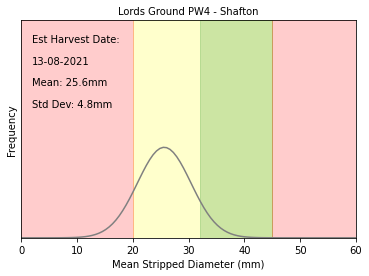

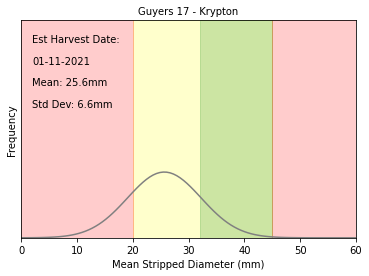

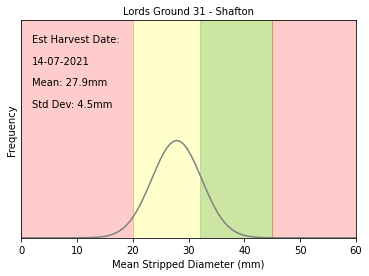

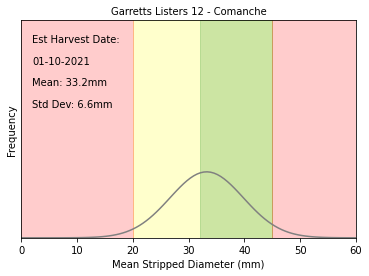

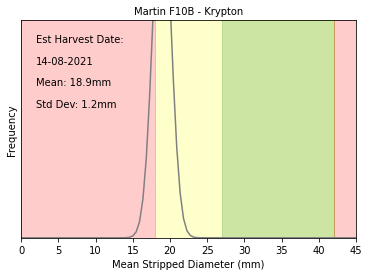

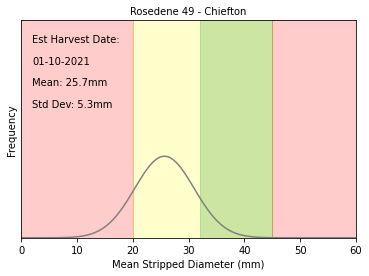

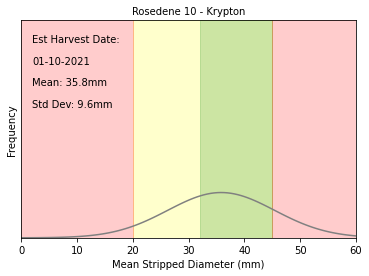

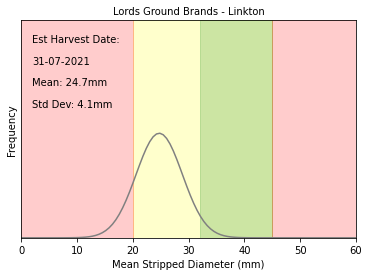

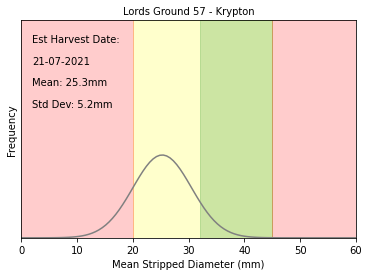

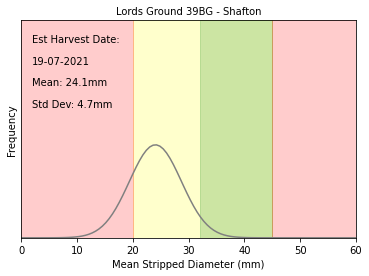

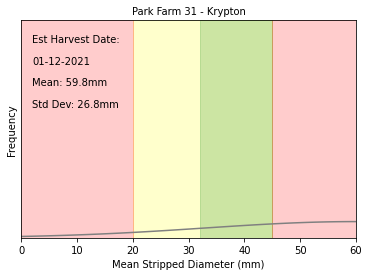

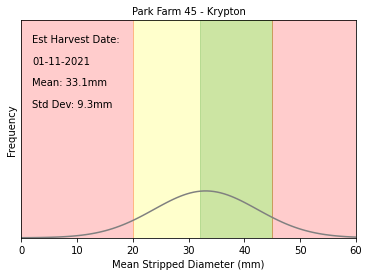

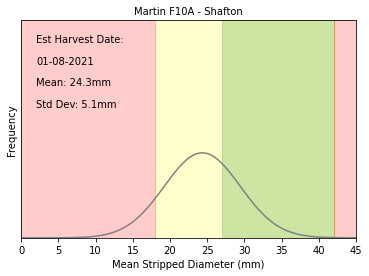

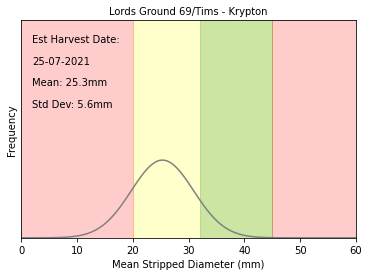

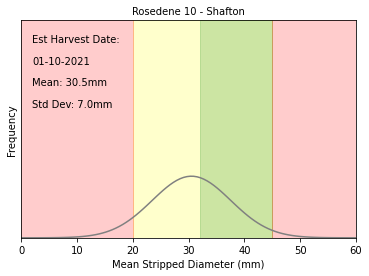

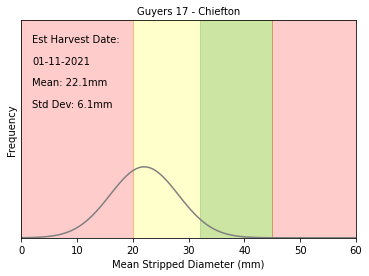

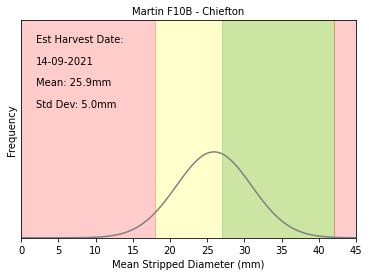

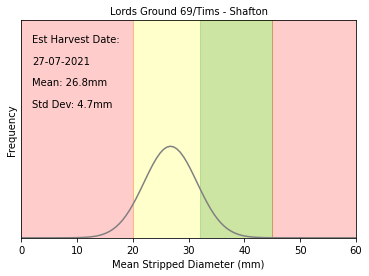

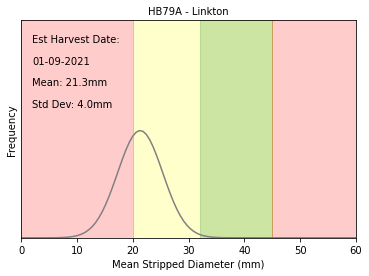

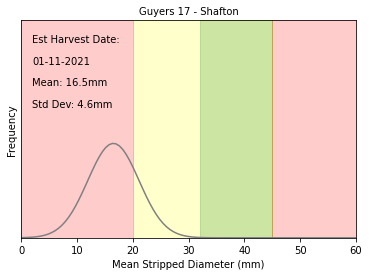

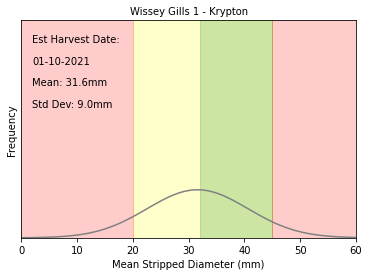

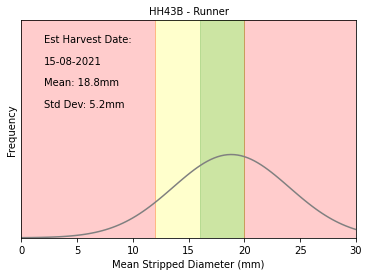

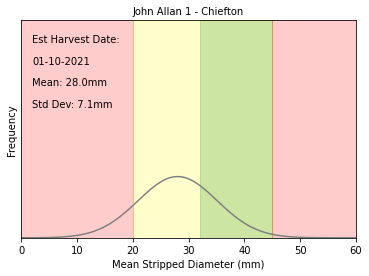

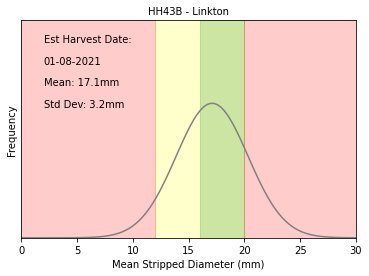

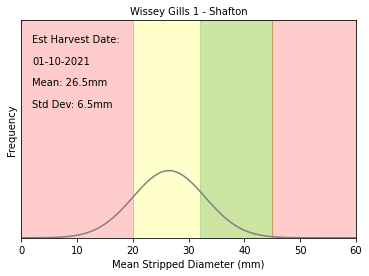

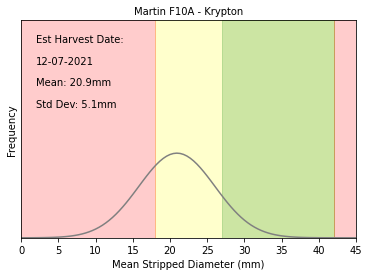

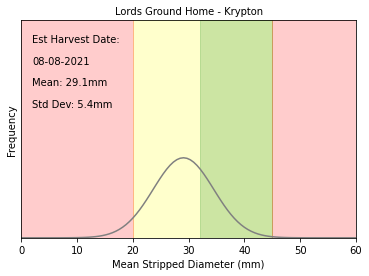

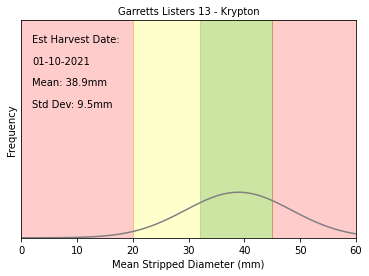

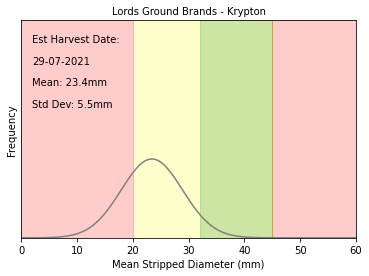

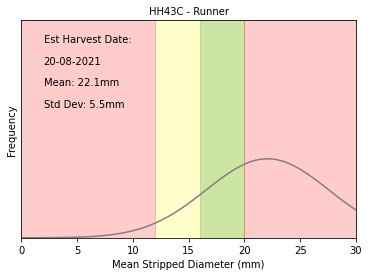

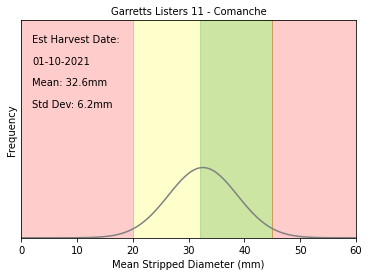

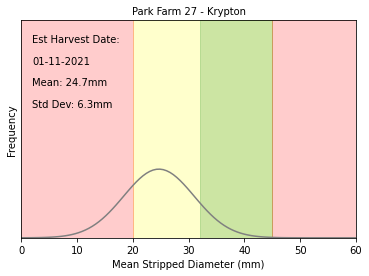

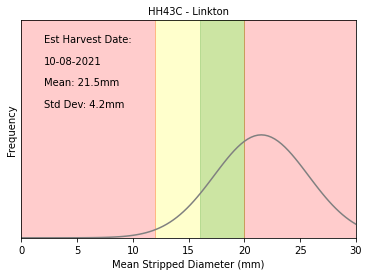

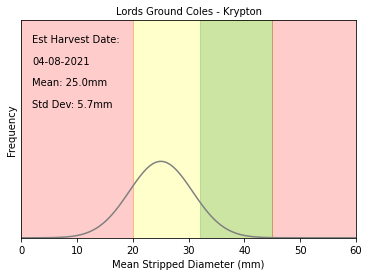

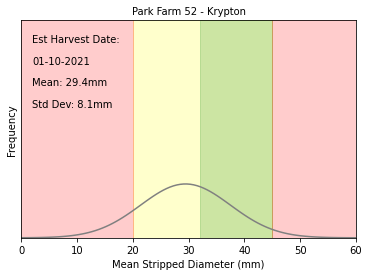

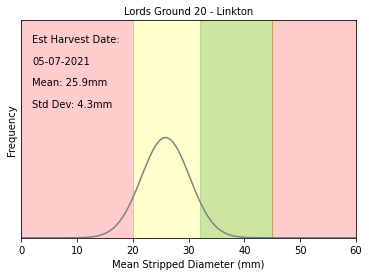

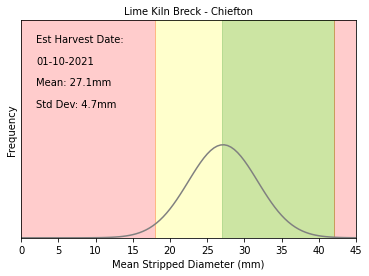

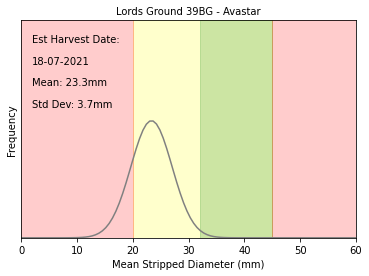

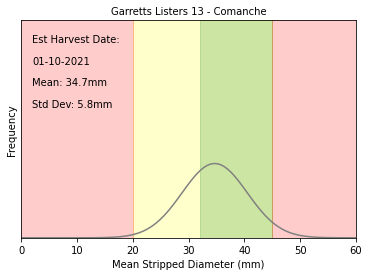

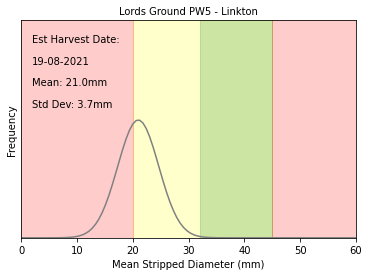

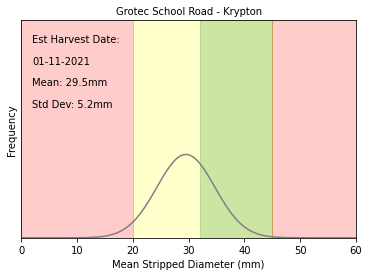

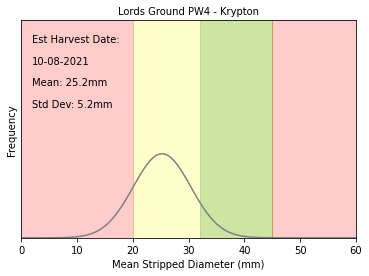

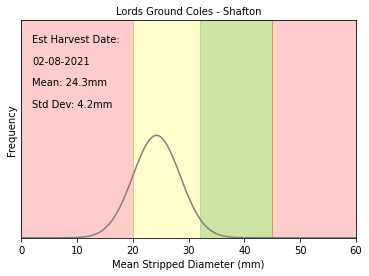

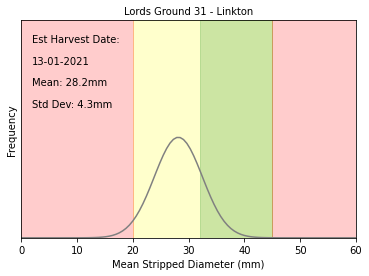

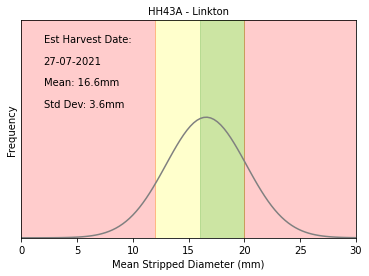

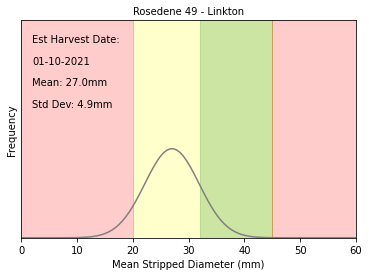

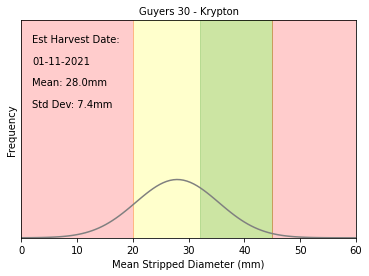

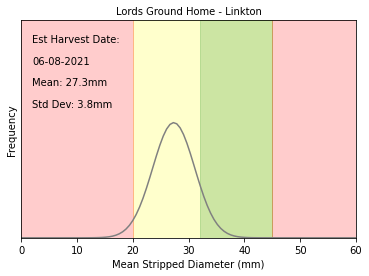

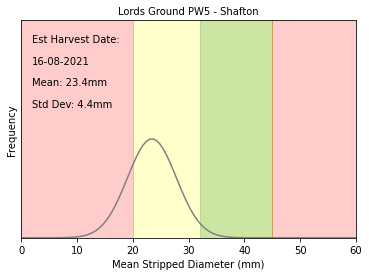

In [47]:
season = datetime(2021, 1, 1)
filt_zone_data = zone_data.loc[(zone_data['planting_date'] > season)]
field_variety_list = list(filt_zone_data['field_variety'])
field_variety_list = set(field_variety_list)
field_variety_list

for fv in field_variety_list:
    df = filt_zone_data.loc[(filt_zone_data['field_variety'] == fv)]
    df = df.reset_index(drop=True)
    inputs = mode(df['inputs'])
    
    if inputs == 'Baby':
        x_min = 0.0
        x_max = 30.0
        up_spec = 20
        low_spec = 12
        low_opt = 16
        
    elif inputs == 'Organic':
        x_min = 0.0
        x_max = 45.0
        up_spec = 42
        low_spec = 18
        low_opt = 27
        
    elif inputs == 'Conventional':
        x_min = 0.0
        x_max = 60.0
        up_spec = 45
        low_spec = 20
        low_opt = 32
        
    mean = df['est_mean_diameter'].mean()
    std = df['est_std_dev_diameter'].mean()

    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,std)
    c = 'grey'
    plt.plot(x,y, color=c)
    plt.grid()
    plt.xlim(x_min,x_max)
    plt.ylim(0,0.20)
    
    d = df.loc[0, 'est_harvest_date']
    d = d.date().strftime('%d-%m-%Y')
    
    plt.text(x=2, y=0.18, s='Est Harvest Date:')
    plt.text(x=2, y=0.16, s=d)
    plt.text(x=2, y=0.14, s=f'Mean: {mean:.1f}mm')
    plt.text(x=2, y=0.12, s=f'Std Dev: {std:.1f}mm')
    plt.grid(False)
    plt.axvspan(low_spec, up_spec, color='yellow', alpha=0.2)
    plt.axvspan(low_opt, up_spec, color='green', alpha=0.2)
    plt.axvspan(0, low_spec, color='red', alpha=0.2)
    plt.axvspan(up_spec, x_max, color='red', alpha=0.2)
    plt.title(f'{fv}',fontsize=10)
    
    new_fv = fv.replace('/', '-')

    plt.xlabel('Mean Stripped Diameter (mm)')
    plt.tick_params(left = False, labelleft = False)
    plt.ylabel('Frequency')

    plt.savefig(f"{new_fv} Population Distribution.png",dpi=600)
    plt.show()
    
